In [4]:
from qdisk.classes import FitsImage
from qdisk.plot import Map
import eDiskplot as eplot
import analysis_utils as au
from eDisk_source_dict import source_dict
import matplotlib.pyplot as plt
from astropy.convolution import Gaussian2DKernel, convolve_fft
%matplotlib widget
%load_ext autoreload
%autoreload 2

source = "L1489IRS"
line = "C18O"
config = "SBLB"
center_coord = source_dict[source]["radec"]
PA = source_dict[source]["PA"]
incl = source_dict[source]["incl"]
distance = source_dict[source]["distance"]

imagename = "./VADP/" + au.get_image_basename(source=source, baseline=config, line=line, robust=1.0, dv=0.2).replace(".fits", "_Fnu.fits")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
rmax = 12
image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
image.shift_phasecenter_toward(center_coord)
image.convert_unit()
image.estimate_rms(rmin=8)
r, I, dI = image.cut(PA=PA, incl=incl, rmax=8, side_average=True)

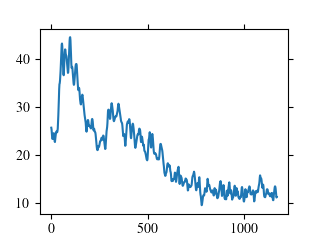

In [5]:
plt.figure()
plt.plot(r*distance, I)

In [33]:
rmax = 5
image = FitsImage(imagename, xlim=(-rmax, rmax), ylim=(-rmax, rmax))
image.shift_phasecenter_toward(center_coord)
image.estimate_rms(rmin=rmax)
# 

vantHoff20_beam = Gaussian2DKernel(x_stddev=au.FWHM_to_sigma(0.4)/image.dpix)
image.data = convolve_fft(image.data, vantHoff20_beam)

image.get_flux(rmax=0.25, rms=image.rms)



(362.3262863774974, 11.917665123110439)

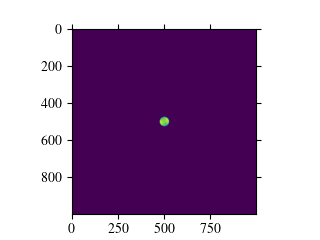

In [34]:
plt.figure()
plt.imshow(image.data * image.mask)

In [22]:
image.rms

2.3385614098075225

In [23]:
image.data_unit

'Jy/beam m/s'

In [25]:
73*3.6

262.8

In [26]:
359/73

4.917808219178082